# Transform 2021 CCS Northern Lights Hackathon Team

#### Contributors:
- Chris Dinneen
- Matt Hall
- Nathaniel Jones
- Fehmi Ozbayrak
- Eva Zimmer

repo: https://github.com/softwareunderground/northern-lights
- Thanks to Equinor for the dataset to work with!
- Thanks to AWS, Studio X, and Agile Scientific for hackathon funding and resources!

### Available low level data/data manipulation

In [1]:
# Generate a List all the files in the azure database
import nl_project as hack # import the project functions/code
import matplotlib.pyplot as plt
%matplotlib inline
azure_data_listing = hack.GetProjectData().report_on_azure_data()
azure_data_listing

,SourceName,size,content_type,file_extensions,category
0,31_5-7 Eos/02.Drilling_and_Completion/CORING_2...,654174,application/pdf,pdf,Drilling_and_Completion
1,31_5-7 Eos/03.Directional_Surveys/WELLPATH_COM...,2392571,text/plain; charset=utf-8,asc,Directional_Surveys
2,31_5-7 Eos/03.Directional_Surveys/WELLPATH_ORI...,7985,text/plain; charset=utf-8,asc,Directional_Surveys
3,31_5-7 Eos/05.LWD_Log_data/WLC_RAW_BHPR-GR-MEC...,1303736,application/pdf,pdf,LWD_Log_data
4,31_5-7 Eos/05.LWD_Log_data/WLC_RAW_CAL-DEN-GR-...,13844987,application/pdf,pdf,LWD_Log_data
...,...,...,...,...,...
16454,31_5-7 Eos/15.Production_Logs/WL_RAW_PROD_AAC-...,62413600,application/octet-stream,dlis,Production_Logs
16455,31_5-7 Eos/15.Production_Logs/WL_RAW_PROD_AAC-...,16765648,application/pdf,pdf,Production_Logs
16456,31_5-7 Eos/15.Production_Logs/WL_RAW_PROD_AAC_...,1222896388,application/octet-stream,dlis,Production_Logs
16457,31_5-7 Eos/15.Production_Logs/WL_RAW_PROD_AAC_...,1258,text/plain; charset=utf-8,asc,Production_Logs


In [2]:
# Let's look at the amount of data per category
data_per_category = azure_data_listing[['category', 'size']].groupby(by='category').sum()
data_per_category['Size KB'] = data_per_category['size'] / 1000
data_per_category['Size MB'] = data_per_category['Size KB'] / 1000
data_per_category['Size TB'] = data_per_category['Size MB'] / 1000
data_per_category

,size,Size KB,Size MB,Size TB
category,,,,
Borehole_Seismic,164298727,1.642987e+05,164.298727,0.164299
Core_Data,73036588292,7.303659e+07,73036.588292,73.036588
Directional_Surveys,2400556,2.400556e+03,2.400556,0.002401
Drilling_and_Completion,654174,6.541740e+02,0.654174,0.000654
Final_Well_Report_and_Completion_Log,11996675,1.199667e+04,11.996675,0.011997
Fluid_Data,1649946,1.649946e+03,1.649946,0.001650
Formation_Pressure_Data,538500428,5.385004e+05,538.500428,0.538500
Geology_Data_and_Evaluations,24461999,2.446200e+04,24.461999,0.024462
LWD_Log_data,557847568,5.578476e+05,557.847568,0.557848


In [3]:
print(f'Total dataset size: {data_per_category["Size TB"].sum()} TB')

Total dataset size: 89.59142998099999 TB


In [4]:
# Let's count file by extension
data_per_ext = azure_data_listing[['SourceName', 'file_extensions']].groupby(by='file_extensions').count()
data_per_ext

,SourceName
file_extensions,
asc,83
dcm,15619
dex,1
dlis,96
las,18
pdf,72
sbg,1
segy,31
spwla,1


In [5]:
# Counts by MIME-Type
data_per_mime = azure_data_listing[['SourceName', 'content_type']].groupby(by='content_type').count()
data_per_mime

,SourceName
content_type,
application/octet-stream,15715
application/pdf,72
application/vnd.openxmlformats-officedocument.spreadsheetml.sheet,1
application/zip,1
image/tiff,536
text/plain; charset=utf-8,134


In [6]:
# Size Per File Extension
# Let's look at the amount of data per category
data_per_category = azure_data_listing[['file_extensions', 'size']].groupby(by='file_extensions').sum()
data_per_category['Size KB'] = data_per_category['size'] / 1000
data_per_category['Size MB'] = data_per_category['Size KB'] / 1000
data_per_category['Size TB'] = data_per_category['Size MB'] / 1000
data_per_category

,size,Size KB,Size MB,Size TB
file_extensions,,,,
asc,1054800866,1.054801e+06,1054.800866,1.054801
dcm,8217612434,8.217612e+06,8217.612434,8.217612
dex,1668102,1.668102e+03,1.668102,0.001668
dlis,14822480930,1.482248e+07,14822.480930,14.822481
las,23408613,2.340861e+04,23.408613,0.023409
pdf,516976997,5.169770e+05,516.976997,0.516977
sbg,198080,1.980800e+02,0.198080,0.000198
segy,133248536,1.332485e+05,133.248536,0.133249
spwla,297528,2.975280e+02,0.297528,0.000298


In [7]:
# Retrieve raw info for a file in the list (not all file types supported yet)
row_to_load = azure_data_listing.iloc[275]
data_name = row_to_load['SourceName']
data = hack.GetProjectData().get_data_with_name(data_name)
# Look at page 59 of the pdf just because
print(data[0][59])

 
Core analysis 
well 
31/5
-
7
 
 
Restric
ted
 
 
29
  
 
 
 
Depth(m)
 
Mpa
 
 
Depth(m)
 
Mpa
 
 
Depth(m)
 
Mpa
 
2748,71
 
62
 
 
2758,91
 
24
 
 
2768,48
 
65
 
2749,27
 
49
 
 
2759,66
 
28
 
 
2769,45
 
15
 
2750,75
 
53
 
 
2760,50
 
23
 
 
2770,70
 
26
 
2751,63
 
42
 
 
2761,27
 
25
 
 
2771,21
 
19
 
2
752,68
 
63
 
 
2762,44
 
24
 
 
2772,80
 
25
 
2753,58
 
18
 
 
2763,19
 
28
 
 
2773,76
 
38
 
2754,90
 
32
 
 
2764,55
 
59
 
 
2774,51
 
25
 
2755,60
 
33
 
 
2765,50
 
31
 
 
2778,88
 
18
 
2756,02
 
33
 
 
2766,49
 
33
 
 
2779,96
 
23
 
2757,20
 
40
 
 
2767,51
 
69
 
 
2780,80
 
24
 



In [8]:
# You can choose to download/not download the file when pulling it
data = hack.GetProjectData().get_data_with_name(data_name, download=True)

Low level api currently supports:
- .asc
- .tif
- .pdf
- .las (?? soon)
- .segy (?? soon)

Future:
- .spwla
- .dex
- .xlsx
- .dlis

### High(er) Level API


In [9]:
interface = hack.CorePhotoInterface(name='31_5-7 Eos')
df = interface.report_available_core_photos()
df

Loading lazily, will only load requested photos


,top_depth,bottom_depth,file_name,file_key,OPERATOR,WELL,WELLBORE,FIELD,RIG,COUNTRY,DRILLPERMIT#,COREPHOTOS
0,2592.0,2593.00,CORE_PHOTO_CT_M_TOP259200_1.TIF,31_5-7 Eos/11.Core_Data/Core_Photos/CORE_PHOTO...,EQUINOR ENERGY AS,31/5-7,31/5-7,EOS,WEST HERCULES,NORWAY,1799-L,CT SCAN OF WHOLECORE
1,2592.0,2593.00,CORE_PHOTO_CT_M_TOP259200_2.TIF,31_5-7 Eos/11.Core_Data/Core_Photos/CORE_PHOTO...,EQUINOR ENERGY AS,31/5-7,31/5-7,EOS,WEST HERCULES,NORWAY,1799-L,CT SCAN OF WHOLECORE
2,2593.0,2594.00,CORE_PHOTO_CT_M_TOP259300_1.TIF,31_5-7 Eos/11.Core_Data/Core_Photos/CORE_PHOTO...,EQUINOR ENERGY AS,31/5-7,31/5-7,EOS,WEST HERCULES,NORWAY,1799-L,CT SCAN OF WHOLECORE
3,2594.0,2594.50,CORE_PHOTO_CT_M_TOP259400_1.TIF,31_5-7 Eos/11.Core_Data/Core_Photos/CORE_PHOTO...,EQUINOR ENERGY AS,31/5-7,31/5-7,EOS,WEST HERCULES,NORWAY,1799-L,CT SCAN OF WHOLECORE
4,2594.5,2595.18,CORE_PHOTO_CT_M_TOP259450_1.TIF,31_5-7 Eos/11.Core_Data/Core_Photos/CORE_PHOTO...,EQUINOR ENERGY AS,31/5-7,31/5-7,EOS,WEST HERCULES,NORWAY,1799-L,CT SCAN OF WHOLECORE
...,...,...,...,...,...,...,...,...,...,...,...,...
80,2776.0,2777.00,CORE_PHOTO_CT_M_TOP277600_1.TIF,31_5-7 Eos/11.Core_Data/Core_Photos/CORE_PHOTO...,EQUINOR ENERGY AS,31/5-7,31/5-7,EOS,WEST HERCULES,NORWAY,1799-L,CT SCAN OF WHOLECORE
81,2777.0,2778.00,CORE_PHOTO_CT_M_TOP277700_1.TIF,31_5-7 Eos/11.Core_Data/Core_Photos/CORE_PHOTO...,EQUINOR ENERGY AS,31/5-7,31/5-7,EOS,WEST HERCULES,NORWAY,1799-L,CT SCAN OF WHOLECORE
82,2778.0,2779.00,CORE_PHOTO_CT_M_TOP277800_1.TIF,31_5-7 Eos/11.Core_Data/Core_Photos/CORE_PHOTO...,EQUINOR ENERGY AS,31/5-7,31/5-7,EOS,WEST HERCULES,NORWAY,1799-L,CT SCAN OF WHOLECORE
83,2779.0,2780.00,CORE_PHOTO_CT_M_TOP277900_1.TIF,31_5-7 Eos/11.Core_Data/Core_Photos/CORE_PHOTO...,EQUINOR ENERGY AS,31/5-7,31/5-7,EOS,WEST HERCULES,NORWAY,1799-L,CT SCAN OF WHOLECORE


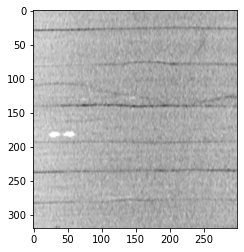

In [10]:
# let's try pulling a sample photo at 2593.2 Meters MD

sample_photo = interface.get_sample_at_depth(2593.2)
plt.imshow(sample_photo)
plt.show()

The default behavoir is to give an 8cm x 8cm sample at the requested depth and to return None if no complete sample is available at a given depth.

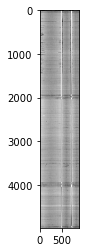

In [11]:
# We can also request a 'block' of core photos:
combined_photo = interface.get_photos_for_depth_range(start_md=2592.0, end_md=2594.0)
plt.imshow(combined_photo['interval 1']) # If our range contains multiple core lengths, they will be split up.
plt.show()

### Important Notes!

- There are very high res photos available in the azure container (300-400 MB per METER). These do NOT show up in the 'azure data explorer' UI for some reason, but they can be downloaded/accessed programmatically. I did not have time to enable working with this data. Plus it is dangerous data in terms of memory/storage/compute. That said it should be easy to add a variable to the core photos interface to switch between core photo series (high/low res). 
- There is a ton of other raw CT outputs that I have no idea what to do with, but they can be accessed via the azure programming API, but not the data access GUI front-end. 

### Siesmic Data (Thanks to Eva!!)

In [12]:
siesmic_interface = hack.BoreholeSiesmicInterface(name='31_5-7 Eos')
print(siesmic_interface.raw_data)

getting raw data
getting computed time data
getting gathered time data
[array([[-4.93152300e-04, -3.58426012e-04, -6.27878588e-04, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-6.98468462e-03, -6.98468462e-03, -6.58050552e-03, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 4.45573404e-03,  4.72518802e-03,  4.99464199e-03, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-1.40065071e-03, -1.40065071e-03, -1.40065071e-03, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.53901118e-04, -2.53901118e-04,  9.41799954e-06, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 7.88253965e-04,  1.29956054e-04,  3.93275172e-04, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]), array([[-2.13679373e-01, -7.16220915e-01, -1.02148628e+00, ...,
         1.69171143e+00,  1.65624046e+00,  0.00000000e+00],
       [ 2.59408295e-01,  8.51183891e-01,  1.3

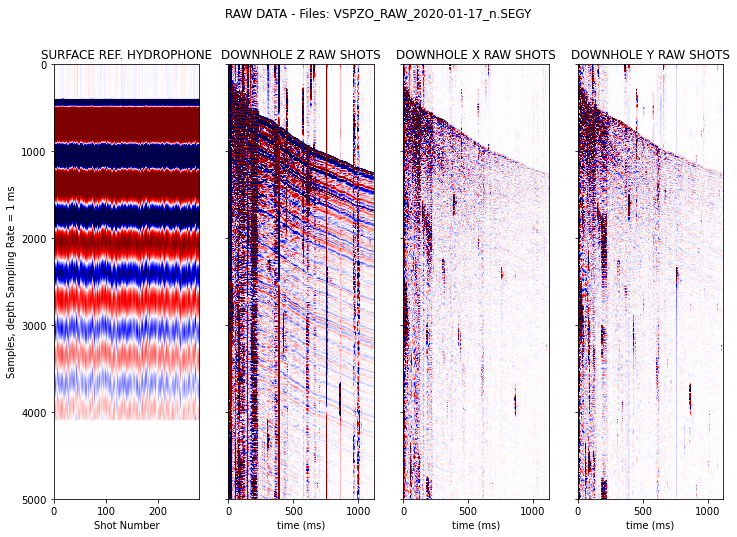

In [13]:
# Collect Raw Borehole Siesmic Data
rawdata1 = siesmic_interface.raw_data[0]
rawdata2 = siesmic_interface.raw_data[1]
rawdata3 = siesmic_interface.raw_data[2]
rawdata4 = siesmic_interface.raw_data[3]
#Showing the loaded raw data    
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(12,8))
fig.suptitle('RAW DATA - Files: VSPZO_RAW_2020-01-17_n.SEGY')

ax1.imshow(rawdata1.T,cmap='seismic',vmin=-0.1, vmax=0.1,aspect='auto')
ax1.set_title('SURFACE REF. HYDROPHONE')
ax1.set_ylabel('Samples, depth Sampling Rate = 1 ms')
ax1.set_xlabel('Shot Number')

ax2.imshow(rawdata2.T,cmap='seismic',vmin=-0.1, vmax=0.1,aspect='auto')
ax2.set_title('DOWNHOLE Z RAW SHOTS')
ax2.set_xlabel('time (ms)')

ax3.imshow(rawdata3.T,cmap='seismic',vmin=-0.1, vmax=0.1,aspect='auto')
ax3.set_title('DOWNHOLE X RAW SHOTS')
ax3.set_xlabel('time (ms)')

ax4.imshow(rawdata4.T,cmap='seismic',vmin=-0.1, vmax=0.1,aspect='auto')
ax4.set_title('DOWNHOLE Y RAW SHOTS')
ax4.set_xlabel('time (ms)')

plt.show()

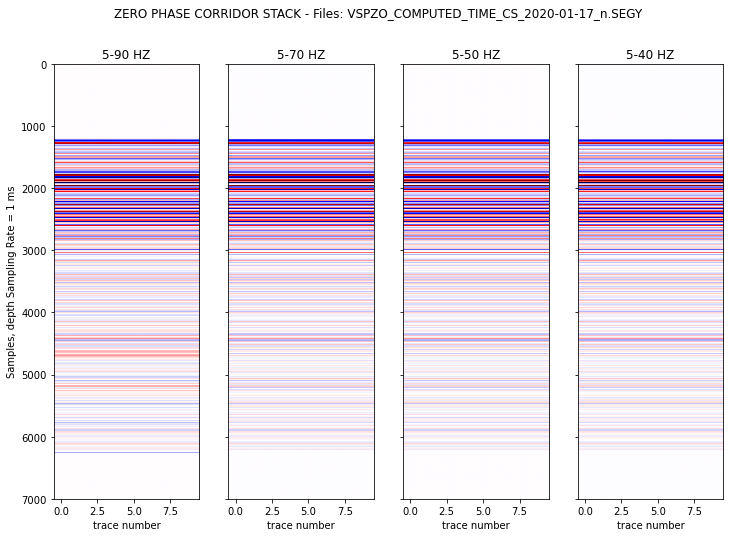

In [14]:
csdata1 = siesmic_interface.computed_time_data[0]
csdata2 = siesmic_interface.computed_time_data[1]
csdata3 = siesmic_interface.computed_time_data[2]
csdata4 = siesmic_interface.computed_time_data[3]


fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(12,8))
fig.suptitle('ZERO PHASE CORRIDOR STACK - Files: VSPZO_COMPUTED_TIME_CS_2020-01-17_n.SEGY')

ax1.imshow(csdata1.T,cmap='seismic',vmin=-5, vmax=5,aspect='auto')
ax1.set_title('5-90 HZ')
ax1.set_ylabel('Samples, depth Sampling Rate = 1 ms')
ax1.set_xlabel('trace number')

ax2.imshow(csdata2.T,cmap='seismic',vmin=-5, vmax=5,aspect='auto')
ax2.set_title('5-70 HZ')
ax2.set_xlabel('trace number')

ax3.imshow(csdata3.T,cmap='seismic',vmin=-5, vmax=5,aspect='auto')
ax3.set_title('5-50 HZ')
ax3.set_xlabel('trace number')

ax4.imshow(csdata4.T,cmap='seismic',vmin=-5, vmax=5,aspect='auto')
ax4.set_title('5-40 HZ')
ax4.set_xlabel('trace number')

plt.show()

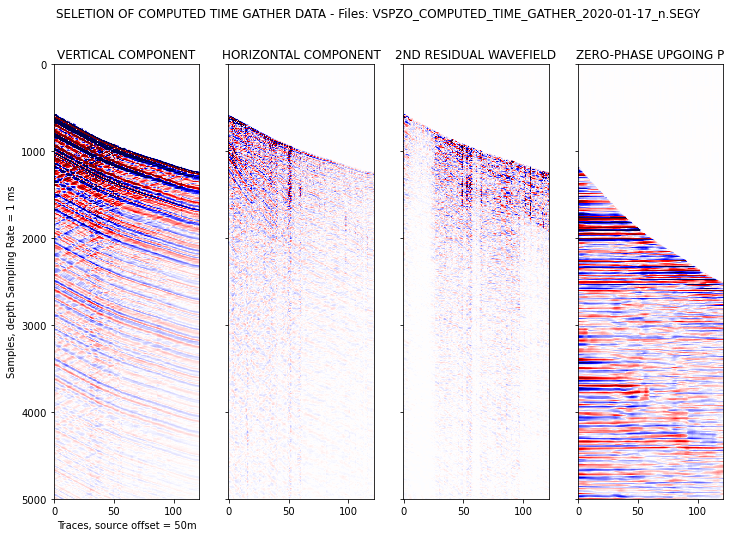

In [15]:
tgdata1 = siesmic_interface.gathered_time_data[11]
tgdata2 = siesmic_interface.gathered_time_data[12]
tgdata3 = siesmic_interface.gathered_time_data[18]
tgdata4 = siesmic_interface.gathered_time_data[22]

#Showing the loaded time gather data 
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(12,8))
fig.suptitle('SELETION OF COMPUTED TIME GATHER DATA - Files: VSPZO_COMPUTED_TIME_GATHER_2020-01-17_n.SEGY')

ax1.imshow(tgdata1.T,cmap='seismic',vmin=-0.1, vmax=0.1,aspect='auto')
ax1.set_title('VERTICAL COMPONENT')
ax1.set_ylabel('Samples, depth Sampling Rate = 1 ms')
ax1.set_xlabel('Traces, source offset = 50m')

ax2.imshow(tgdata2.T,cmap='seismic',vmin=-0.1, vmax=0.1,aspect='auto')
ax2.set_title('HORIZONTAL COMPONENT')
#ax2.set_xlabel('time (ms)')

ax3.imshow(tgdata3.T,cmap='seismic',vmin=-0.1, vmax=0.1,aspect='auto')
ax3.set_title('2ND RESIDUAL WAVEFIELD')
#ax3.set_xlabel('time (ms)')

ax4.imshow(tgdata4.T,cmap='seismic',vmin=-5, vmax=5,aspect='auto')
ax4.set_title('ZERO-PHASE UPGOING P')
#ax4.set_xlabel('time (ms)')

plt.show()

### Core Descriptions (Thanks to Matt!!)

In [16]:
description_interface = hack.CoreDescriptionInterface(name='31_5-7 Eos')
sample_description = description_interface.get_nearest_desc_for_depth(2643.7)
sample_description

,depth,descr,"Nitrogen Permeability, Hor.","Klinkenberg corrected gas perm, Hor.","Nitrogen Permeability, Vert.","Klinkenberg corrected gas perm, Vert.","Porosity, Horizontal PLUG","Porosity, Vertical PLUG","Porosity, Summation",CORE Oil Saturation,CORE Water Saturation,"Grain Density, Hor."
0,2643.75,"Calcst.Lg-gry.Consol.VW-cmt.W-srt. w/ltl-C,Cl,...",0.01161,0.00604,-1002.0,-1002.0,6.40322,-1002.0,-1002.0,-1002.0,-1002.0,2.69815


Loading Photo at idx: 5


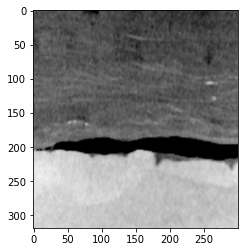

In [17]:
#Let's get a photo sample to go with that description!
sample_photo = interface.get_sample_at_depth(2643.7)
plt.imshow(sample_photo)
plt.show()

### Biostrat (Thanks to Equinor/Matt!!)

### Well Log Data (Thanks to Fehmi!!)